In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Dataset

In [3]:
raw_dataset=pd.read_csv('/content/dataset_stat_pokemon_gen_1.csv')

# EDA

## Check data completeness

In [4]:
#missing value
raw_dataset.isnull().sum()

,0
pokemon_name,0
primary_type,0
secondary_type,84
hp,0
attack,0
defense,0
special_attack,0
special_defense,0
speed,0
image_url,0


In [5]:
print(raw_dataset.shape) #check data dimenssion row x columns

print(raw_dataset.duplicated().sum()) #check duplicated rows

print(raw_dataset['pokemon_name'].nunique()) #check unique value of pokemon_name


(151, 10)
0
151


## Central Measurment

In [6]:
raw_dataset.describe()

,hp,attack,defense,special_attack,special_defense,speed
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225
std,28.590117,26.755421,26.916704,28.534199,24.208797,27.024598
min,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000
25%,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000
50%,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000
75%,80.000000,92.000000,84.000000,87.500000,80.000000,90.000000
max,250.000000,134.000000,180.000000,154.000000,125.000000,150.000000


/tmp/ipython-input-234112625.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


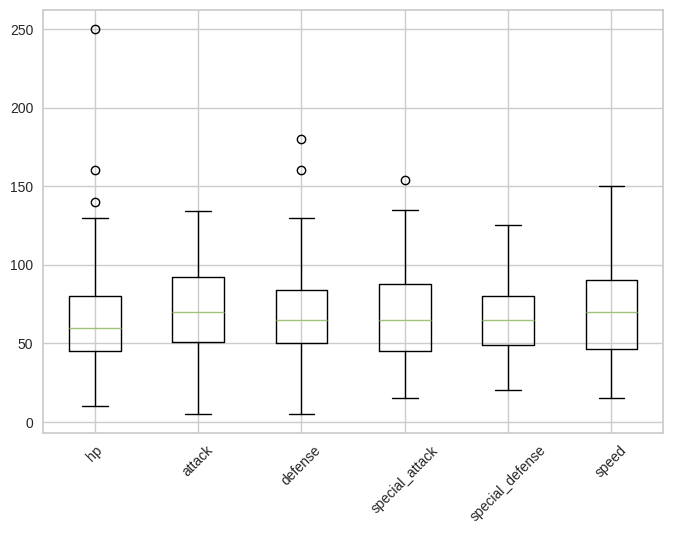

In [7]:
#boxplot to checek data distribution and outlier

plt.boxplot(
    [raw_dataset[col] for col in raw_dataset.select_dtypes(include="number").columns],
    labels=raw_dataset.select_dtypes(include="number").columns
)
plt.xticks(rotation=45)
plt.show()

## Data Distribution

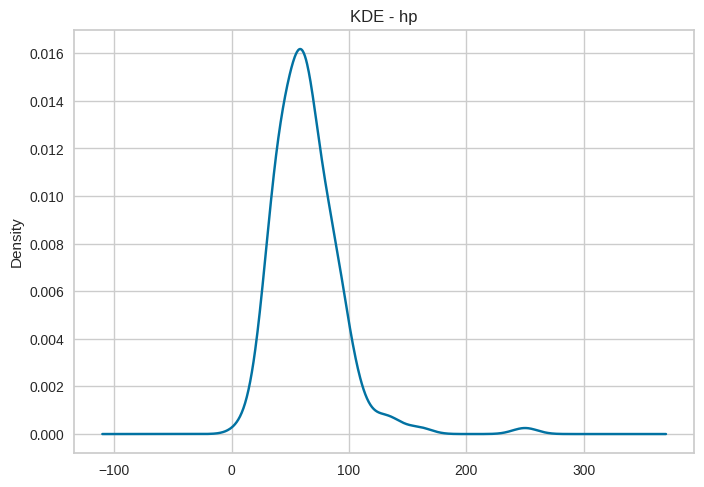

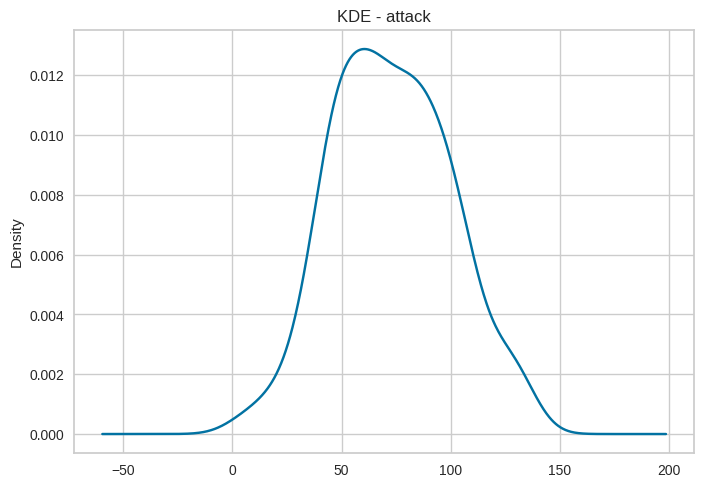

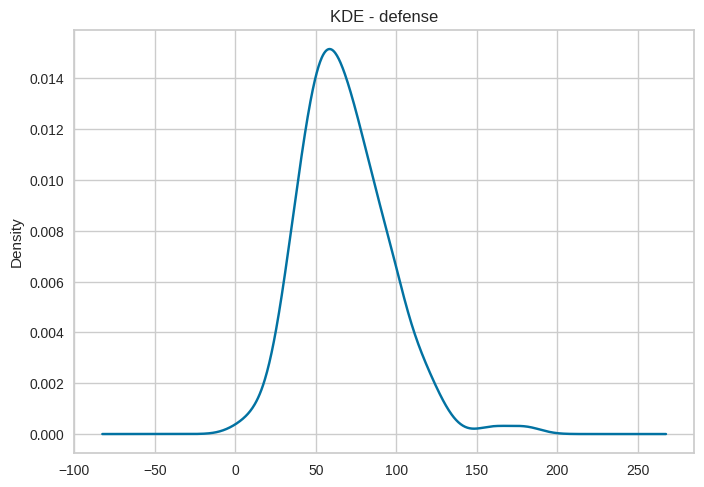

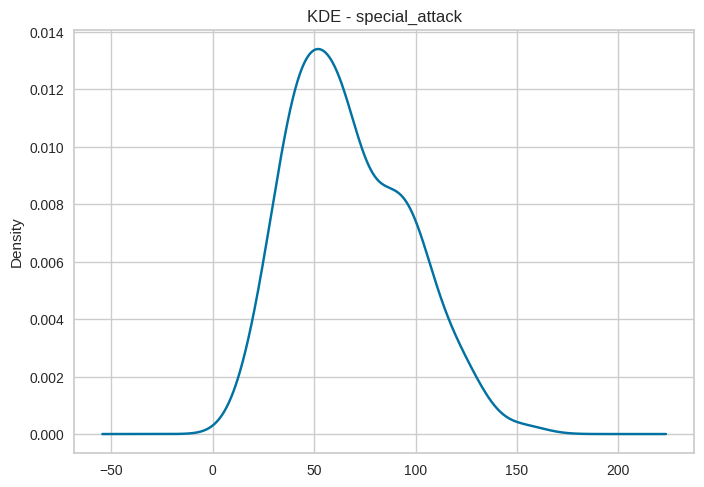

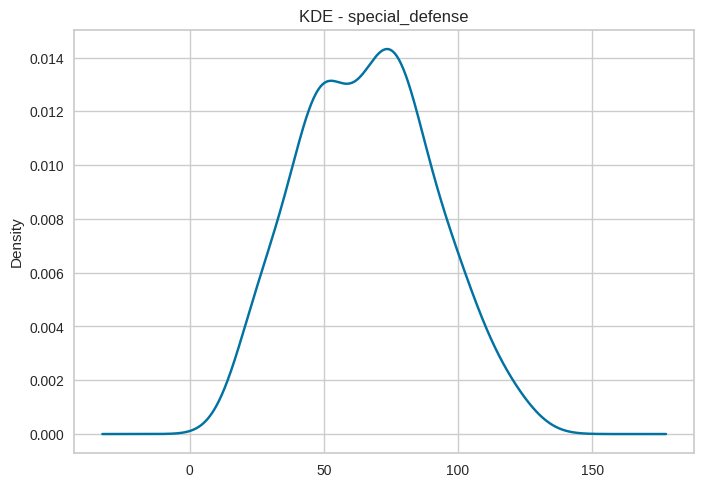

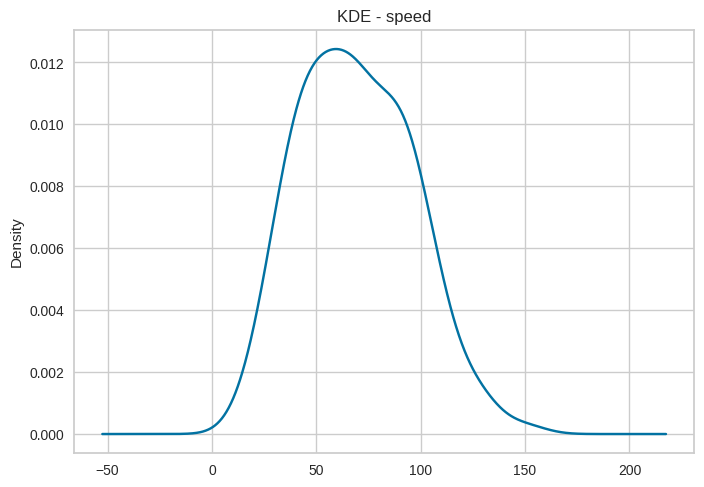

In [8]:
for col in raw_dataset.select_dtypes("number").columns:
    raw_dataset[col].dropna().plot(kind="kde", title=f"KDE - {col}")
    plt.show()

## Correlation

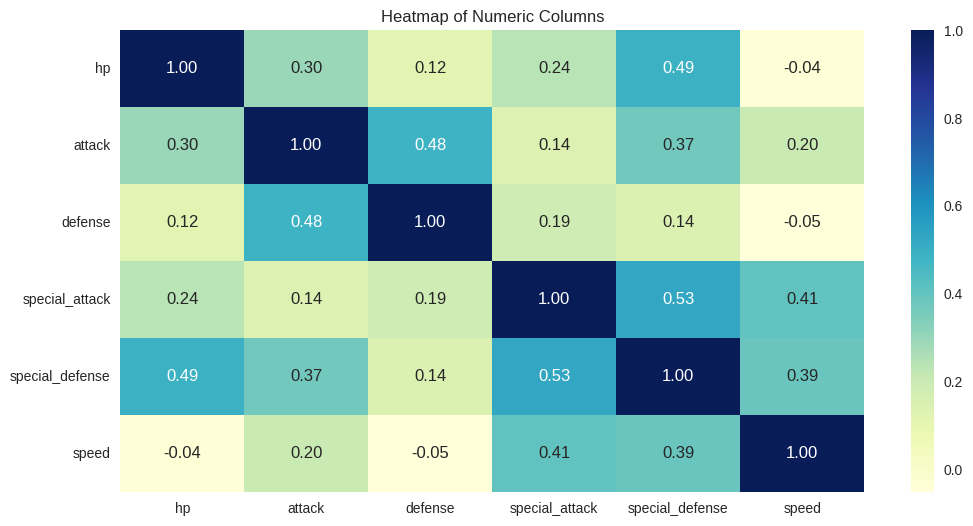

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(raw_dataset[raw_dataset.select_dtypes("number").columns].corr(), cmap="YlGnBu",fmt=".2f",annot=True)
plt.title("Heatmap of Numeric Columns")
plt.show()

# K Means Clustering

## Defining the number of cluster using Elbow methode

In [10]:
dataset_kmeans=raw_dataset.set_index("pokemon_name").select_dtypes("number")
dataset_kmeans.head(5)

,hp,attack,defense,special_attack,special_defense,speed
pokemon_name,,,,,,
Bulbasaur,45,49,49,65,65,45
Ivysaur,60,62,63,80,80,60
Venusaur,80,82,83,100,100,80
Charmander,39,52,43,60,50,65
Charmeleon,58,64,58,80,65,80


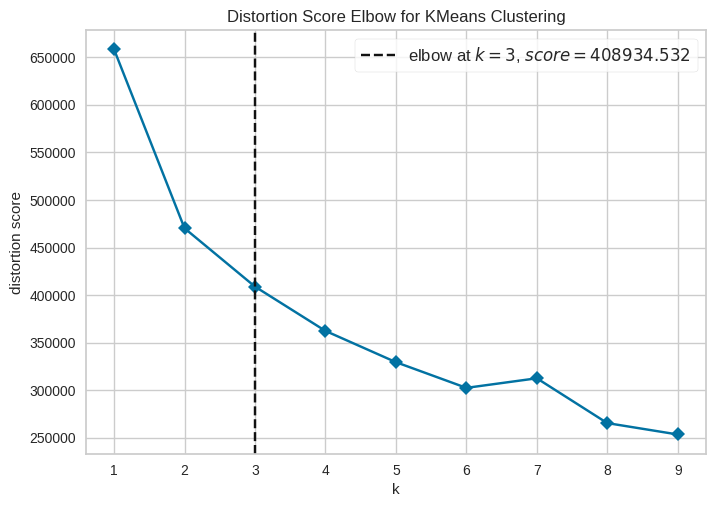

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
model = KMeans(random_state=42, n_init='auto')

# Menghitung nilai Within-Cluster Sum of Squares (WCSS) disetiap K cluster
visualizer = KElbowVisualizer(model, k=(1, 10), metric='distortion', timings=False)
visualizer.fit(dataset_kmeans)

# K optiamal = adanya gap/selisih terbesar pada iterasi perhitungan WCSS disetiap number of cluster
k_optimal = visualizer.elbow_value_
visualizer.show()

## KMeans using K=3 & 4

In [12]:
#apply kmeans with k = 3
dataset_kmeans_k3=raw_dataset.set_index("pokemon_name").select_dtypes("number")

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
dataset_kmeans_k3['Cluster_Label'] = kmeans.fit_predict(dataset_kmeans_k3)

In [13]:
#centroid of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[ 78.27142857,  84.1       ,  69.65714286,  83.75714286,
         84.71428571,  86.74285714],
       [ 58.4       ,  86.2       , 108.6       ,  57.2       ,
         52.2       ,  49.        ],
       [ 49.23214286,  53.        ,  48.41071429,  50.80357143,
         49.        ,  55.92857143]])

In [14]:
#apply kmeans with k = 4
dataset_kmeans_k4=raw_dataset.set_index("pokemon_name").select_dtypes("number")

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
dataset_kmeans_k4['Cluster_Label'] = kmeans.fit_predict(dataset_kmeans_k4)

In [15]:
#centroid of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[ 64.54545455,  80.63636364,  65.77272727,  84.20454545,
         79.88636364,  98.27272727],
       [ 56.30434783,  87.82608696, 107.82608696,  52.82608696,
         50.2173913 ,  49.56521739],
       [ 47.96226415,  52.60377358,  47.09433962,  49.33962264,
         47.52830189,  57.01886792],
       [ 97.38709677,  85.61290323,  78.4516129 ,  83.96774194,
         90.        ,  62.67741935]])

In [16]:
#add label
def cluster_name_generator(x) :
  label=None
  if x == 0 :
    label = "The Speedsters"
  elif x == 1 :
    label = "The Heavy Armor"
  elif x == 2 :
    label = "The Commoners / Un-evolved"
  else :
    label = "The Tanks & Bruisers"
  return label

dataset_kmeans_k4['cluster_name']=dataset_kmeans_k4['Cluster_Label'].apply(lambda x : cluster_name_generator(x))

In [21]:
dataset_kmeans_k4['avatar_image_url']=raw_dataset['image_url'].tolist()
dataset_kmeans_k4['primary_type']=raw_dataset['primary_type'].tolist()
dataset_kmeans_k4['secondary_type']=raw_dataset['secondary_type'].tolist()

In [26]:
dataset_kmeans_k4=dataset_kmeans_k4.reset_index()[['pokemon_name', 'primary_type', 'secondary_type', 'hp', 'attack','defense', 'special_attack', 'special_defense', 'speed', 'avatar_image_url','Cluster_Label','cluster_name']]

# Export Dataset

In [27]:
dataset_kmeans_k4.to_csv("dataset_clustering_result_with_k_4.csv",index=None,sep=';')